<a href="https://colab.research.google.com/github/prashantRmishra/Tensorflow_learnings/blob/master/keras_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


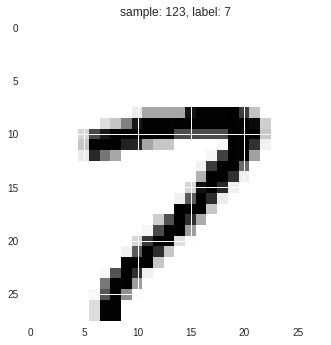

In [10]:
import matplotlib.pyplot as plt
def display_function(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train_images[num].reshape([28,28])
  plt.title('sample: %d, label: %d'%(num,label))
  plt.imshow(image)
  plt.show()
  
  
display_function(123)  
  

here comes the best part , in keras we are not suppose to define complex mathematical expression for our neural network model ,in keras it requires to define 784 inputs fed to 512 hidden layer (inner neurons) then output to 10 neurons giving the final output of our neural network.

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

creating our model for training and testing is also just one line of code.

In [14]:
history=model.fit(train_images,train_labels,batch_size=100,epochs=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2440 - acc: 0.9283 - val_loss: 0.1232 - val_acc: 0.9620
Epoch 2/10
 - 6s - loss: 0.0993 - acc: 0.9705 - val_loss: 0.0917 - val_acc: 0.9722
Epoch 3/10
 - 6s - loss: 0.0657 - acc: 0.9801 - val_loss: 0.0784 - val_acc: 0.9767
Epoch 4/10
 - 6s - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0753 - val_acc: 0.9782
Epoch 5/10
 - 6s - loss: 0.0366 - acc: 0.9889 - val_loss: 0.0776 - val_acc: 0.9774
Epoch 6/10
 - 6s - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0736 - val_acc: 0.9798
Epoch 7/10
 - 6s - loss: 0.0217 - acc: 0.9937 - val_loss: 0.0700 - val_acc: 0.9808
Epoch 8/10
 - 6s - loss: 0.0172 - acc: 0.9950 - val_loss: 0.0654 - val_acc: 0.9823
Epoch 9/10
 - 6s - loss: 0.0126 - acc: 0.9965 - val_loss: 0.0753 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0761 - val_acc: 0.9813


In [15]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07607049331194285
Test accuracy: 0.9813


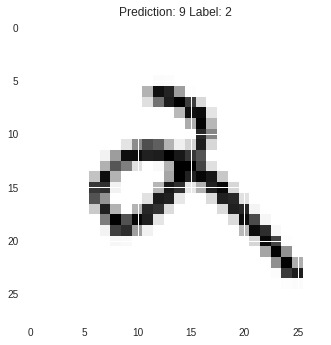

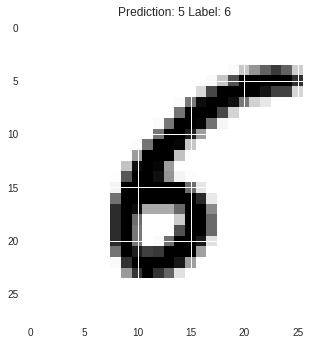

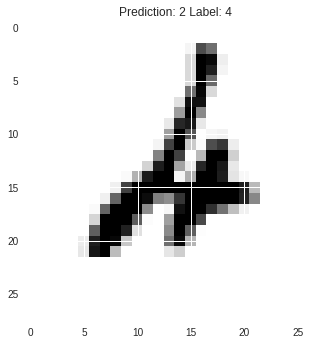

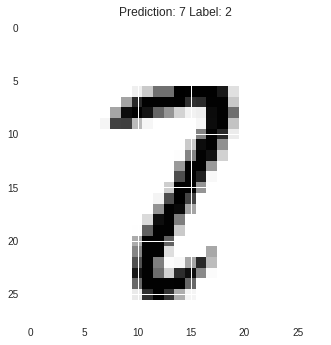

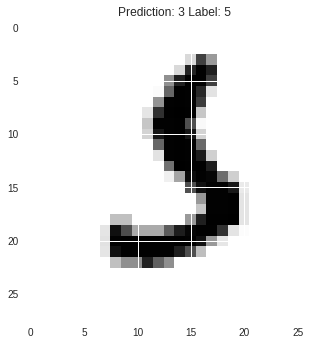

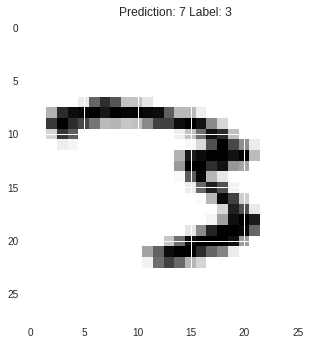

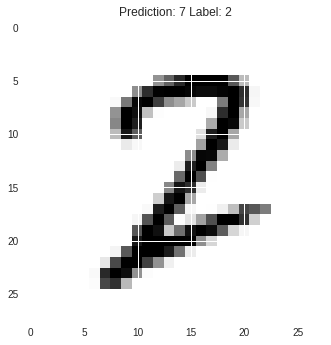

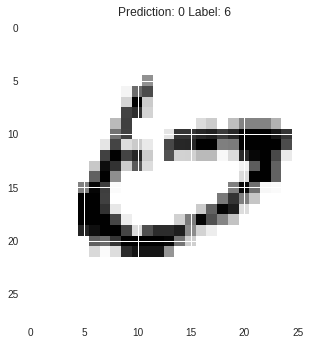

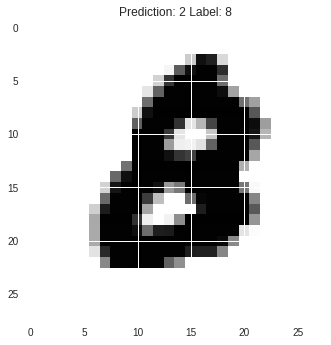

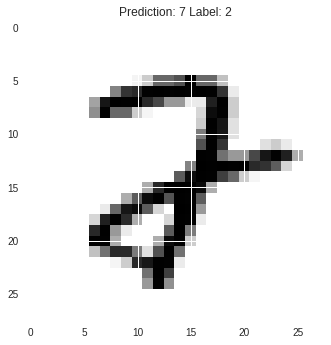

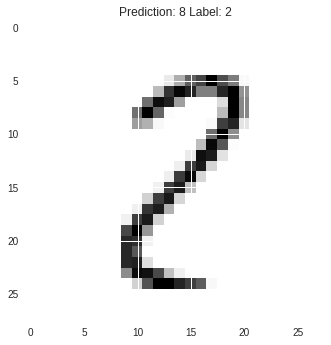

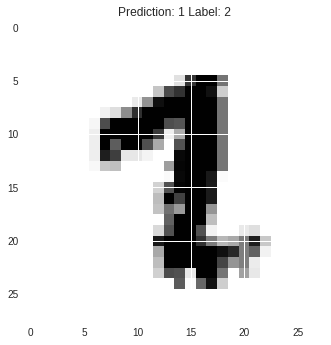

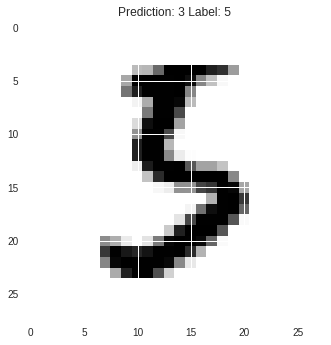

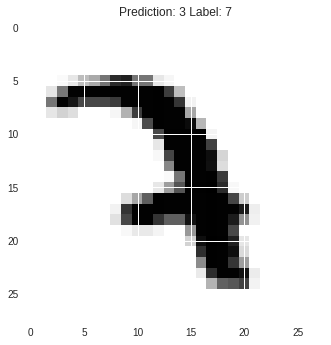

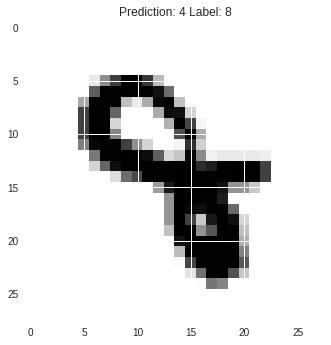

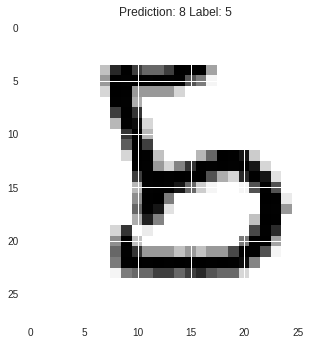

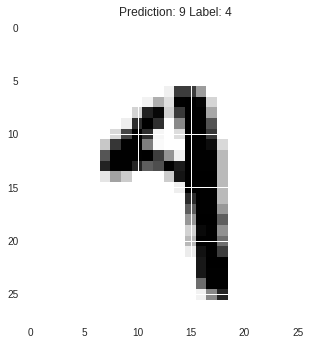

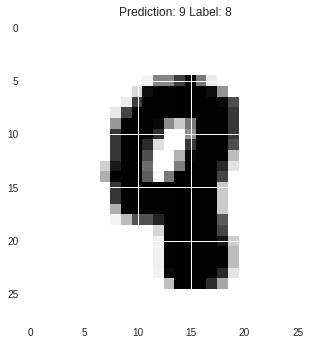

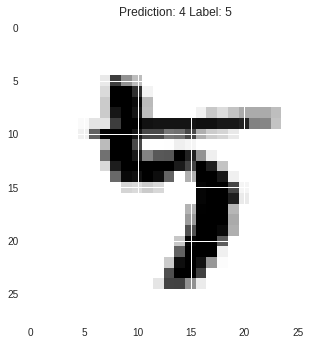

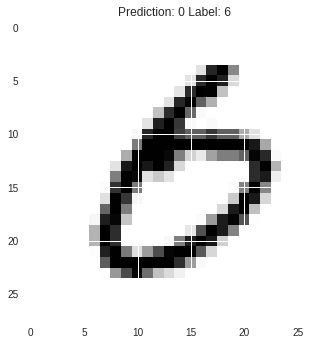

In [16]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()